# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,2,3]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,6353,8808,7684,2405,3516,7844
2,13265,1196,4221,6404,507,1788


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

The outliers does not allow to conclude so much yet. Observe that the standar deviations are larger than the means per se for 5 of the 6 features (Fresh, Grocery, Frozen, Detergentes_Paper, Delicatessen). Thus, distributions are spread out and useless skew.



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for feature in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature], axis = 1)
    new_labels = data[feature]

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_labels, test_size = 0.25, random_state = 0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor = regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    print('{:20} Score: {:06.4f}'.format(feature, score))

Fresh                Score: -0.2525
Milk                 Score: 0.3657
Grocery              Score: 0.6028
Frozen               Score: 0.2540
Detergents_Paper     Score: 0.7287
Delicatessen         Score: -11.6637


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

At first sight, 'Delicatessen' sounds like something non-basic among the purchases. That category sounds more like luxury items. Thus, this category might outstand from the others, thus, can be described by analizing the others as a set. 

Then, I tested by removing one by one category an applying a tree regressor to predict the removed category, this loop allowed me to compare scores and prove that 'Delicatessen' is that kind of category that outstands from the others because it got the lowest R^2 score, actually it got a negative score.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Users/luischapa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


Text(0.5,0.95,u'Categories Scatter Plot')

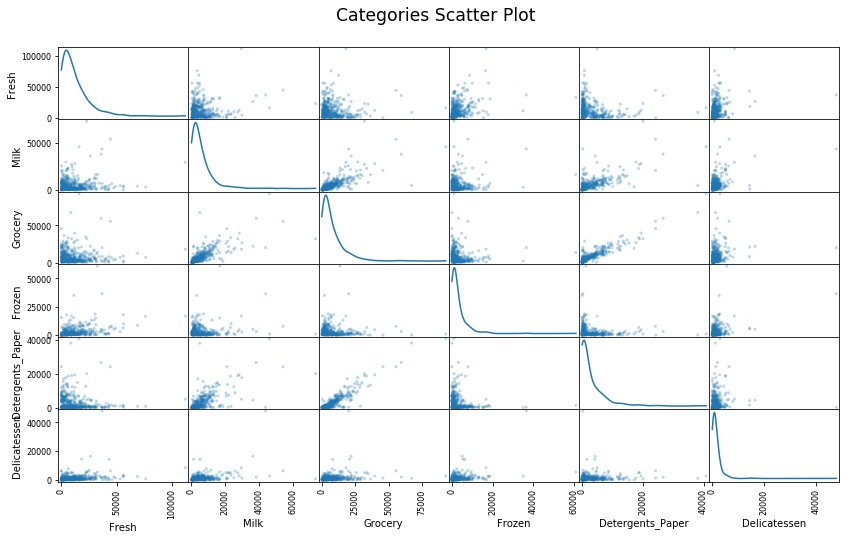

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.suptitle('Categories Scatter Plot', x=0.5, y=0.95, ha='center', fontsize='xx-large')

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer 1 to Question 3:**

* As it is observed in the scatter plot **'Categories Scatter Plot'** above for each intersection of each category, as well as in the histogram **'Categories Histogram'** below, the 6 categories of products are having a skewed to the left distribution. This is because of the outliers far away the mean. Most of them has a mean around 20000, but all of them has a few bunch of points by the 40000 and farther even. That's why the histograms are skewed to the left. Nevertheless I believe that, once having get rid of those outliers, the distribution can be a normal one.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f185990>,
      dtype=object)

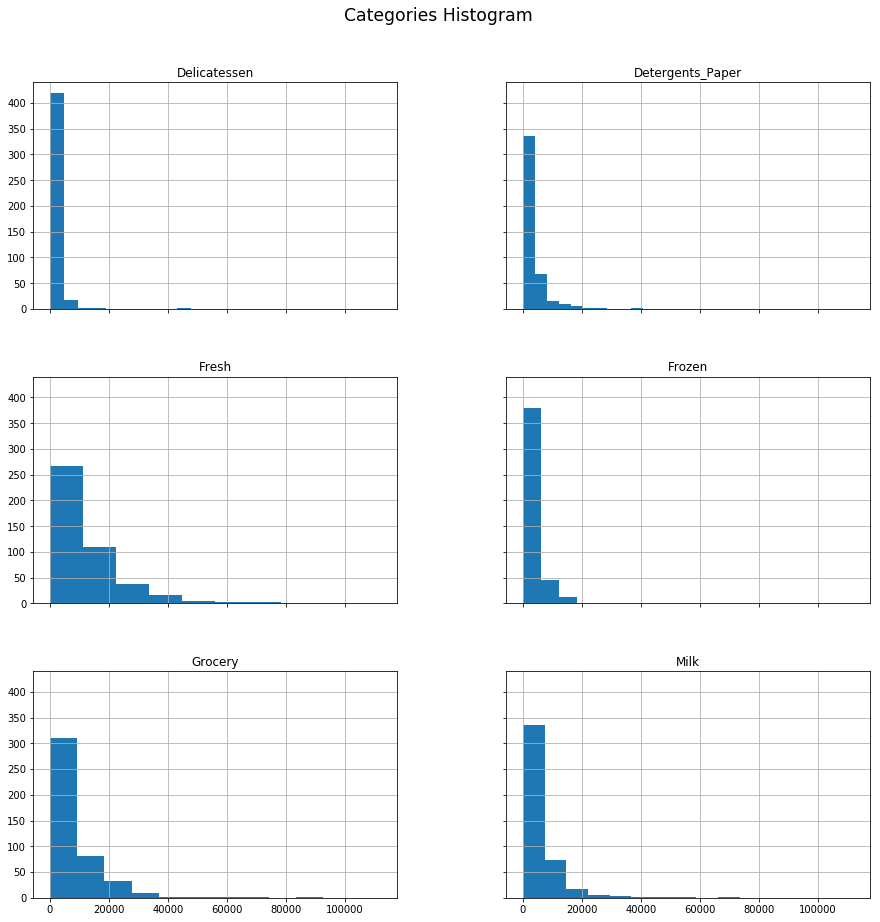

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize = (15,15))
plt.suptitle('Categories Histogram', x=0.5, y=0.95, ha='center', fontsize='xx-large')
data.hist(ax = axes)

**Answer 2 to Question 3:**

* Accordingly to the scatter plot **'Categories Scatter Plot'** above, I observed that three of the six categories has a clear and strong correlation. Check out the following intersections:

1. Milk and Detergents_Paper, as well as Milk and Grocery.
2. Grocery and Detergents_Paper, as well as Grocery and Milk.
3. Detergents_Paper and Grocery, as well as Detergents_Paper and Milk.

Thus, Grocery, Milk and Detergents_Paper are strong correlated and can be combined as one feature.

In the heatmap below **'Correlation Coefficient among Categories Heatmap'** I can confirm that the three categories show the highest correlation coefficients among the other categories intersections.


Text(0.5,0.95,u'Correlation Coefficient among Categories Heatmap')

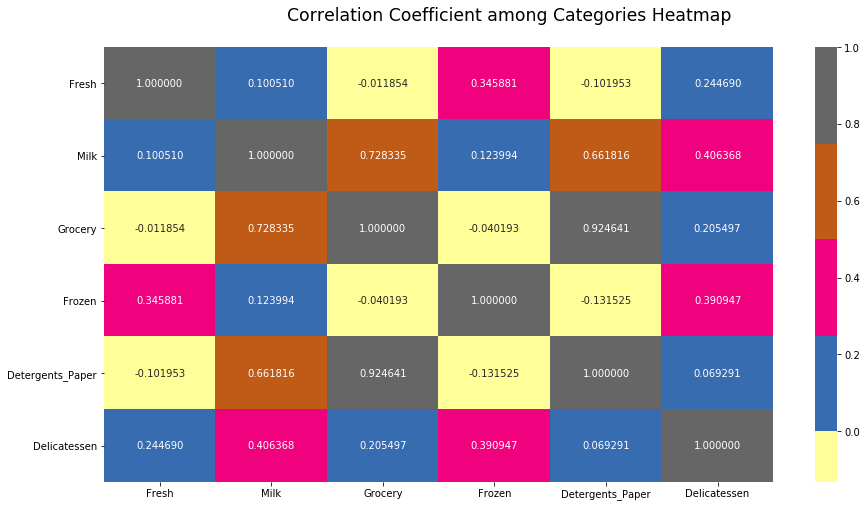

In [7]:
#Calculatins correlations
from seaborn import heatmap

y = data.corr(method = 'pearson')

plt.figure(figsize = (15, 8))
heatmap(y, center = 0, annot=True, fmt="f", cmap= 'Accent')
plt.suptitle('Correlation Coefficient among Categories Heatmap', x=0.5, y=0.95, ha='center', fontsize='xx-large')

**Answer 3 to Question 3:**

In Question 2 I attemped to predict 'Delicatessen' category. Accordingly to the scatter plot **'Categories Scatter Plot'** and the heatmap **'Correlation Coefficient among Categories Heatmap'** above, this category is the one set apart from the others, with the lowest correlation coefficient in the heatmap and with a clear cluster of points (no correaltion at all) where the central of the distribution migth be located (after having get rid of outliers) this is the most distinct category from the others.


**Answer 4 to Question 3:**

As I mentioned above, after having get rid of outliers, I noticed that the distribution of each one of the categories is approaching to normal.


----
The following posts helped me to get answers to the Question 3.


> Jim Frost (May 13, 2017) How to Interpret Regression Models that have Significant Variables but a Low R-squared [Blog post]. Retrieve from: http://statisticsbyjim.com/regression/low-r-squared-regression/


> Stephanie (February 18, 2018) Correlation Coefficient: Simple Definition, Formula, Easy Steps [Blog post]. Retrieve from: http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/

> Nancy R. Tague (2004) Typical Histogram Shapes and What They Mean [Blog post]. Retrieve from http://asq.org/learn-about-quality/data-collection-analysis-tools/overview/histogram2.html 

----


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [8]:
from scipy.stats import boxcox

# TODO: Scale the data using the boxcox
boxcox_data = pd.DataFrame()
for feature in data.columns:
    t, _ = boxcox(np.array(data[[feature]])) 
    t = t.reshape(-1)
    boxcox_data[feature] = pd.Series(t.astype(np.float))
    
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
2,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    in_data = (log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)
    out_data = ~in_data
    index_numbers = log_data[out_data].index.values.tolist()
    [outliers.append(i) for i in index_numbers]
    
    display(log_data[out_data])
    
# OPTIONAL: Select the indices for data points you wish to remove
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [11]:
outliers.sort()

repeated_indices = [i for i in outliers if outliers.count(i) > 1]  
if len(repeated_indices) > 0:
    print('There are {} outliers are in common for more tha one category: {}'.format(len(repeated_indices), repeated_indices))
 
#TODO remove from samples if it is there
sample_out_indices = set()
[sample_out_indices.add(i) for i in outliers if i in indices]
if len(sample_out_indices) > 0:
    for i in sample_out_indices:
        indices.remove(i)
        replace_index = i + 1
        while len(indices) < 3:
            if replace_index not in outliers:
                indices.append(replace_index)
            else:
                replace_index+= 1
    samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
    log_samples = np.log(samples)


There are 11 outliers are in common for more tha one category: [65, 65, 66, 66, 75, 75, 128, 128, 154, 154, 154]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

1. Yes, there are several points repeated in more than one category. However I estimate those points are not so many, just a few of them: 11. 

2. Absolutely, all those outliers must be removed from the dataset. First of all, the outliers affect negatively to the application of finding-cluster algorithms (k-means), as well as the normal distribution of the dataset. Remember that k-means starts by setting ramdom points around the dataset, then it starts grouping the points and recenter itself, which for only one, or only too few of them, the starting random point migth be getting away from the center of the most of the points are located, resulting in a skewed cluster.

3. The step before this one, a Tukey's Method was applied to the dataset in order to determine and remove every outlier, thus eliminate the skewness of the dataset.

Observe the below pplot **'After preProcessing Categories Scatter'** in order to see how the dataset looks after the pre-processing (scaling and remove outliers).


/Users/luischapa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  
/Users/luischapa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


Text(0.5,0.95,u'Boxcox preProcessing Categories Scatter')

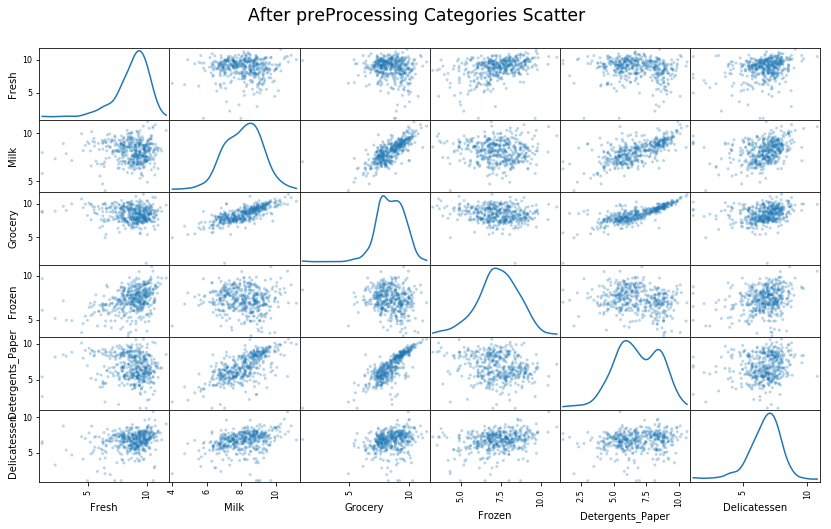

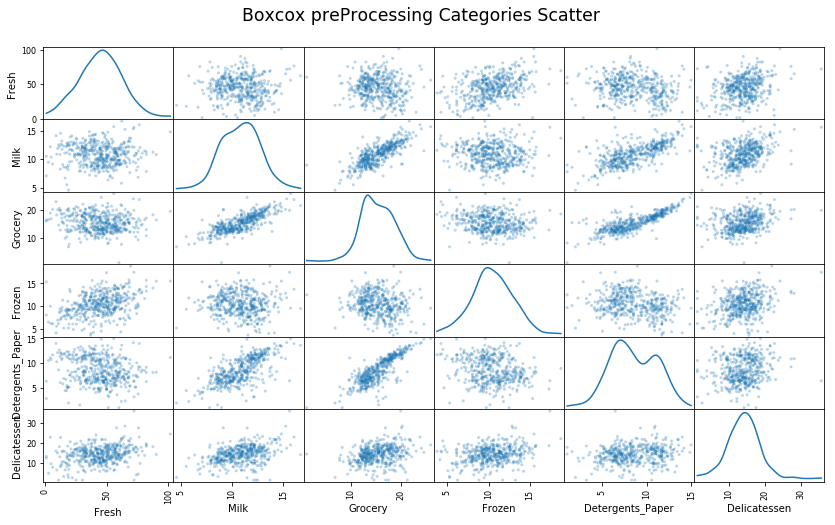

In [12]:
# Produce a scatter matrix for each pair of newly-transformed features LOG
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.suptitle('After preProcessing Categories Scatter', x=0.5, y=0.95, ha='center', fontsize='xx-large')

# Produce a scatter matrix for each pair of newly-transformed features BOXCOX
pd.scatter_matrix(boxcox_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.suptitle('Boxcox preProcessing Categories Scatter', x=0.5, y=0.95, ha='center', fontsize='xx-large')


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

1st Comp 49.93% + 2nd Comp 22.59% explains: 72.53%
The first four components explains: 92.80%
[[-0.09758688  0.41085006  0.45111781 -0.12804262  0.75951245  0.15785331]
 [ 0.60077834  0.1369893   0.08516261  0.62996118 -0.03761194  0.46344461]
 [-0.74520543  0.15440822 -0.02038937  0.26695167 -0.23485013  0.54221164]
 [ 0.26670888  0.13749532  0.0709773  -0.71328102 -0.31568384  0.54451588]
 [ 0.0114087   0.70825884  0.31682301  0.06711674 -0.47290085 -0.41197399]
 [-0.05428877 -0.51774387  0.82668599  0.04707807 -0.20803866 -0.00937317]]


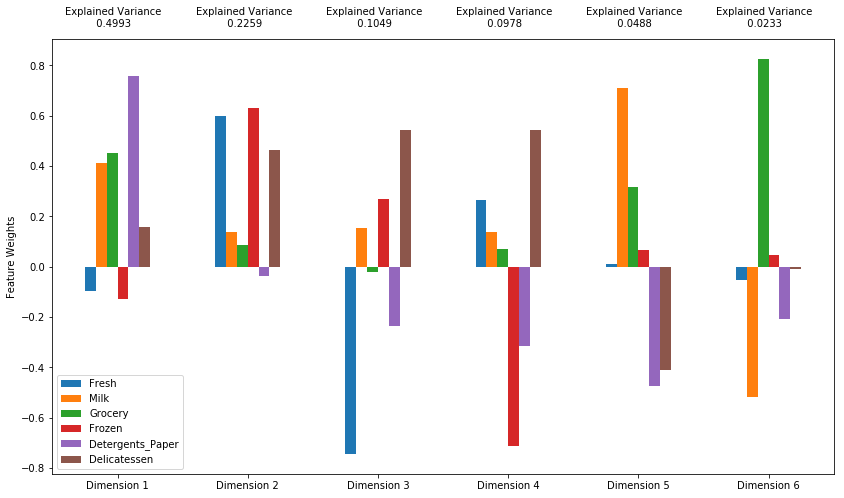

In [13]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6, svd_solver='auto')
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

print('1st Comp {:.2f}% + 2nd Comp {:.2f}% explains: {:.2f}%'.format(
    pca.explained_variance_ratio_[0] * 100,
    pca.explained_variance_ratio_[1] * 100,
    (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100
))

print('The first four components explains: {:.2f}%'.format(
    (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] +
     pca.explained_variance_ratio_[2] + pca.explained_variance_ratio_[3]) * 100
))

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print(pca.components_)


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

1. The 1st (49.93%) and 2nd (22.59%) principal components together explains: 72.53%  of the total variance.
2. While the first four principal components together explains: 92.80%  of the total variance.
3. Per description of the dataset at the begining of this document ([UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)) I dare my insight in the following type of customers (clusters or segments) accordingly to thier spendings:

**For dimension 1**: [Detergents_Paper, Grocery, Milk] are the three heviest features in this dimension. 
> Grouping the three as only one: Grocery, this migth be due to Retail type-customer. Where the end-consumers goes for spending money in supplies for a period of time (weekly or so).

**For dimension 2**: [Frozen, Fresh, Delicatessen] are the three heviest features in this dimension.
> Frozen and Fresh as well as Delicatessen looks as the spending of Restaurant type-customer. So they hold ingredients for their daily menus.

**For dimension 3**: [(-) Fresh, Delicatessen, Frozen] are the three heviest features in this dimension.
> A Hotel type_customer offers some sort of food to their guests, those foods are not so often asked thats why Frozen and Delicatessen are the most required, but Fresh.

**For dimension 4**: [(-) Frozen, Delicatessen, (-) Detergents_Paper] are the three heviest features in this dimensions
.
> A Cafè type-customer, although their mainly serves coffee or some other alike drinks, diners usually accompany their drinks with some sort of foods, Delicatessen foods is a must in Cafè. Notice as well, Frozen is a negative in this dimenssion, this migth be because Fresh foods are common in restaurants, but they are not in Cafès. 

----
The following posts helped me to get answers to the Question 3.


> Matt Brems (April 17, 2017) A One-Stop Shop for Principal Component Analysis [Blog post]. Retrieve from: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

> George Dallas (Octuber 30, 2013) Principal Component Analysis 4 Dummies: Eigenvectors, Eigenvalues and Dimension Reduction [Wordpress post]. Retrieve from: https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/




### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))
display(log_samples)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8820,0.4617,0.2764,0.1055,0.0958,-0.2093
1,1.9935,1.2471,1.2157,0.6134,-0.6732,-0.3420
2,-0.9986,1.3694,0.2854,-0.3997,-0.6781,0.6194


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
2,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2, svd_solver='auto')

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8820,0.4617
1,1.9935,1.2471
2,-0.9986,1.3694


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

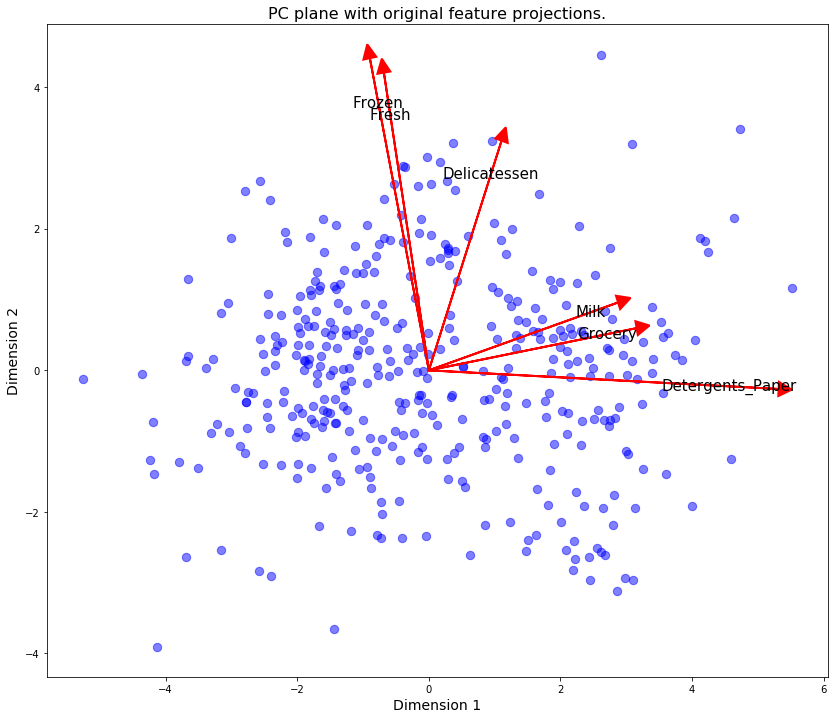

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

1. The main advantage of K-means is its simplicity, only the number of clusters to find and the number of times it should loop is enough for having the first clusters appear. So, it is used for input for a more robust algorithm.
2. For soft clustering algorithms like Gaussian Mixture Model (GMM), the most outstanding advantage is the flexibility when delimiting clusters.
3. The above advantage of the GMM makes it suitable for customer spendings segments, because this, consuming, is a human related activity, so it does not have absolute limits. Thus, setting probabilities of belonging to one cluster or another allows taking decisions more easily and with wider room for maneuver.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score

cluster_range = np.arange(2,11)
best_clusterer = None
best_score = 0.0
best_cluster_number = 0
for cluster_number in cluster_range:

    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components = cluster_number, 
                                init_params = 'kmeans', 
                                covariance_type= 'full', 
                                random_state = 0)
    clusterer = clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print('The silhouette score is {:.4f} for {:d} number of clusters'.format(score, cluster_number))
    
    if score > best_score:
        best_cluster_number = cluster_number
        best_score = score
        best_clusterer = clusterer
        best_preds = preds
   

# TODO: Find the cluster centers
centers = best_clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = best_clusterer.predict(pca_samples)

print('For {} number of clusters, the best silhouette score is {:.4f}'.format(best_cluster_number, best_score))

The silhouette score is 0.4468 for 2 number of clusters
The silhouette score is 0.3526 for 3 number of clusters
The silhouette score is 0.3151 for 4 number of clusters
The silhouette score is 0.3136 for 5 number of clusters
The silhouette score is 0.3384 for 6 number of clusters
The silhouette score is 0.2499 for 7 number of clusters
The silhouette score is 0.3199 for 8 number of clusters
The silhouette score is 0.3438 for 9 number of clusters
The silhouette score is 0.3168 for 10 number of clusters
For 2 number of clusters, the best silhouette score is 0.4468


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

1. I tested from 2 to 10 number of clusters in order to find out the best score for the best number of clusters. As it is oberved in the output above.
2. I found out that the best score is reached for 2 number of clusters. That might be because customers, despite their kind of business, could be clustered in only 2 big clusters or groups.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

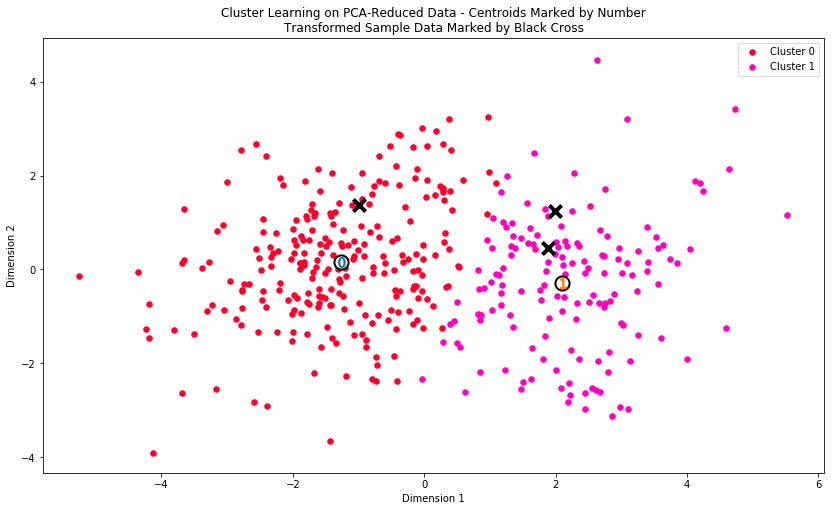

In [19]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, best_preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

As it is oberved in the plot above **'Centers per true category'** I can notice the following:

**Segment 0**: 4 [Milk, Grocery, Detergents_Paper, Delicatessen] of the 6 categories are having low spending amount. Which makes me thinks this is regards to a Hotel, Restaurant and Cafè type of business. These business does not required to hold such a big stock of merchandise. On the oher hand, 2 catgories [Fresh, Frozen] are having high spending amount in this segment. This migth be because these 2 categories are perishable items (food), so, they get these supplies more often as it get consumed in their business. I would say this segment is for **Retail** kind of business

**Segment 1**: It happends the opposite, here we can see that 2 categories [Frozen, Fresh] are low spending amount, because this mercandises cannot be in stock for so long. On the other hand [Milk, Grocery, Detergents_Paper, Delicatessen] are high. So, this segment it must be likely for **Wholesale**, Supermarkets and alike kind of business.


[Text(0,0,u'Segment 0'), Text(0,0,u'Segment 1')]

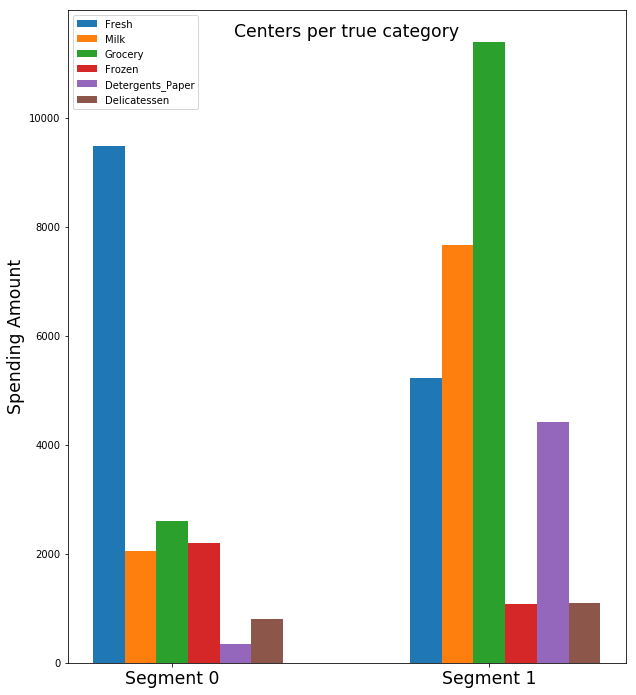

In [21]:
ind = np.arange(2)
width = 0.10

fig, ax = plt.subplots(figsize = (10,12))

rects = []
i = 0
for feature in data.columns:
    i = i + 1
    rect = ax.bar(ind + width * i, true_centers[[feature]].values.reshape(-1), 
                   width)
    rects.append(rect)
    
ax.legend(rects, data.columns)
ax.set_ylabel('Spending Amount', fontsize='xx-large')
ax.set_title('Centers per true category',  x=0.5, y=0.95, ha='center', fontsize='xx-large')
ax.set_xticks(ind + width * 3)
ax.set_xticklabels(true_centers.index.values, fontsize='xx-large')

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


Text(0.5,0.95,u'Sample points')

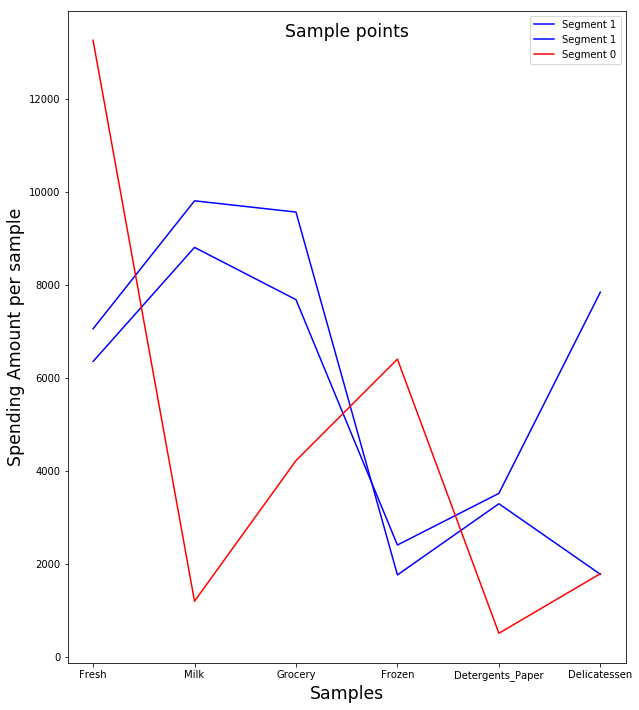

In [22]:
fig, ax = plt.subplots(figsize = (10,12))

# Display the predictions
for i, pred in enumerate(sample_preds):
    print('Sample point {:d} predicted to be in Cluster {:d}'.format(i, pred))
    if pred == 0:
        color = 'r'
        label = 'Segment 0'
    else:
        color = 'b'
        label = 'Segment 1'
    ax.plot(np.arange(0,samples.shape[1]), samples.iloc[i].values, color = color, label=label)

ax.set_xticks(np.arange(0,samples.shape[1]))
ax.set_xticklabels(samples.columns)
ax.legend()
ax.set_ylabel('Spending Amount per sample', fontsize='xx-large')
ax.set_xlabel('Samples', fontsize='xx-large')
ax.set_title('Sample points',  x=0.5, y=0.95, ha='center', fontsize='xx-large')


**Answer:**

1. In the plot **'Sample Points'** we observed the each of the three samples grouped by color accordingly to the cluster the belong to in the prediction.
2. I believe it is completly consistent, check the blue points that belong to the segment 1, the follow the same path. The red path is the other Segment 0 sample.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The dataset, nor the detected Customer Segments have relevant information about the time. I mean, how often they expect their orders to be delivered independently of the type of merchandise (for example perishable). 

However, from that same dataset and the analisys to clusters done so far, we can infer that for retail customers, the more often they get their orders the better, and for the whole sale customers, there is a wider margin to apply an experiment. 

So, I suggest, apply to the wholesale customers (supermarkets, self-service, and big stores) an **A|B Testing** in order to expecte a positive reaction from Segment 1.


----
This Blog Post helped me to understand A|B Testin, so I could make the suggestion.


> Michael Barber (Jan 28, 2018) Data science you need to know! A/B testing [Blog post]. Retrieve from: https://towardsdatascience.com/data-science-you-need-to-know-a-b-testing-f2f12aff619a


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

It seems a perfect task a Logistic Regression classifier. This is because of the dichotomy of the outcome (Segment 0, Segment 1), the input independent variables, those are cardinal (numbers), and the result of this model is a number, a probability of belonging to one Segment or the other which is accordinly to the outcome of the Gaussian Mixture Model (probability).

After trained a Logistic Regresssion Classifier, the new customers could be easily classified into one Segment, thus, schedule a suitable delivery of their orders, then, the service will be inteligently looking after customers one step ahead of them.

Also Support Vector Machine classifier might help in this task because of the cardinal input variables it accepts more suitable.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

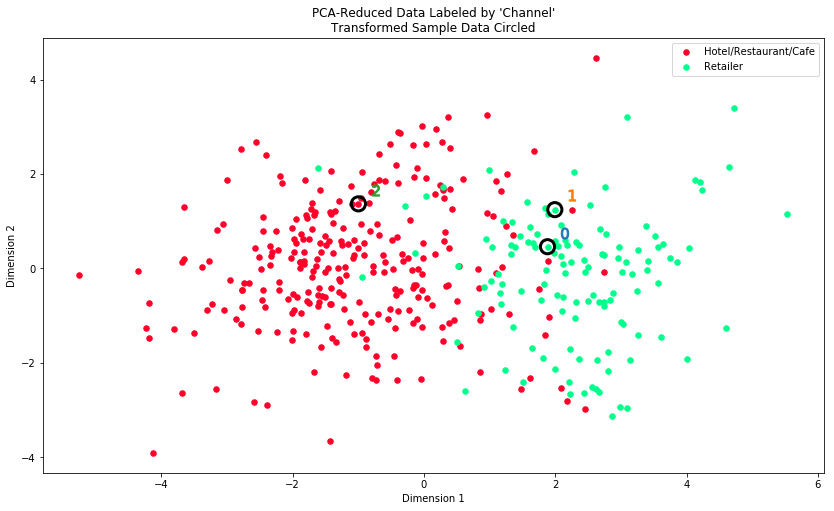

In [23]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

1. I qualify the result of this clustering project as excelent, because of the result of it is very similar to the Channel feature dropped at the begining of it. It converge to same result, but diferent name. One of the customers with retail business of their own, is at the same time a wholesale to this distribution business. In the same order of ideas, a Cafè|Restaurant|Hotel is a retail customer to my distribution business.  
2. I think so, the closer to the centers of each Segments of customers they are, the purely classified (probability tends to 1). 
3. Not so much. At **Question 1** I could not make any insigths about the classifications because of the skewness as well as outliers I wrote down. At **Question 2** I thougth Delicatessen might guide the classification, but now I realize I was wrong. Anyways thats why these projects are for, accept or reject hypothesis such as the ones at the begining of this document.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.